In [2]:
%matplotlib widget
import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

In [3]:
# Load publicly available data from Mark Churchland's group
path = "exampleData.mat"
datas, times = load_churchland_data(path)

n = len(times)
t = np.array(times)

print(f'len(times) = {len(times)}')
print(t)


len(times) = 61
[-50 -40 -30 -20 -10   0  10  20  30  40  50  60  70  80  90 100 110 120
 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300
 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480
 490 500 510 520 530 540 550]


In [36]:
extra_dims = 3
cycle = t * 2.5 * np.pi/ (t[-1]) 
datas = []

for _ in range(108):
    x = t * np.sin(cycle) + np.random.normal(0, 0.01, n)
    y = t * np.cos(cycle) + np.random.normal(0, 0.01, n)
    z = t + np.random.normal(0, 1, n)
    tmp = np.hstack(
        (np.array([x, y, z]).T, 
        np.random.multivariate_normal(
            np.zeros(extra_dims),0.01*np.eye(extra_dims),t.shape[0]
        ))
    )
    # tmp = np.array([x, y, z]).T
    # tmp = np.hstack((
    #     np.array([x, y, z]).T, 
    #     np.zeros((t.shape[0],extra_dims))  
    # ))
    # tmp = np.repeat(np.array([x, y]).T,109,axis=-1)
    
    datas.append(tmp)

print(f'len(datas) = {len(datas)}')
print(f'datas[0].shape = {datas[0].shape}')

len(datas) = 108
datas[0].shape = (61, 6)


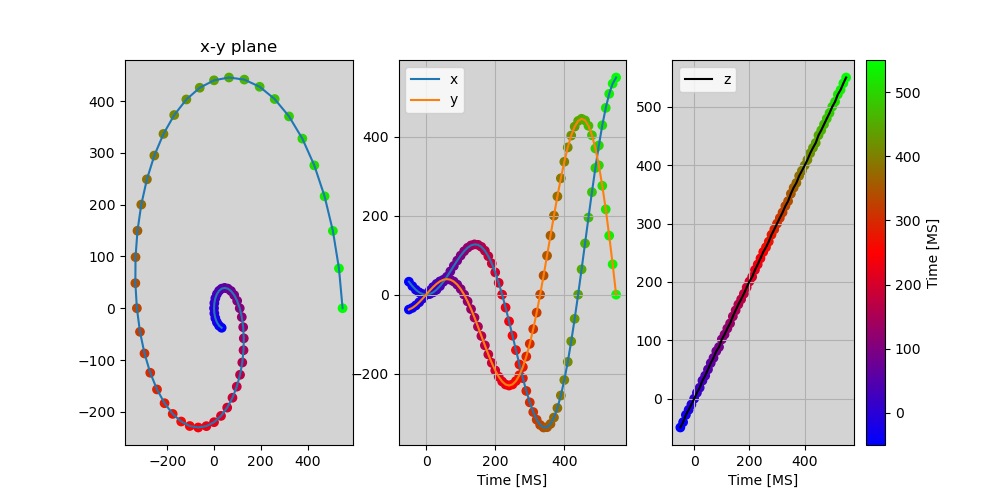

In [78]:
fig, axes = plt.subplots(1,3 , figsize=(10, 5))
axes[0].plot(datas[0][:, 0], datas[0][:, 1])
axes[0].set_title('x-y plane')
axes[0].set_facecolor('lightgray')
for i in range(2):
    l = 'x' if i == 0 else 'y'
    axes[1].plot(t, datas[0][:, i], label=l)
    axes[1].scatter(t, datas[0][:, i], c=t, cmap='brg')
axes[2].plot(t, datas[0][:, 2], label='z', color='black')
axes[2].scatter(t, datas[0][:, 2], c=t, cmap='brg')

plt.colorbar(
    axes[0].scatter(datas[0][:, 0], datas[0][:, 1], c=t, cmap='brg'), 
    ax=axes[2], label='Time [MS]'
)
for i in range(1,3):
    axes[i].grid()
    axes[i].legend()
    axes[i].set_xlabel('Time [MS]')
    axes[i].set_facecolor('lightgray')

plt.show()

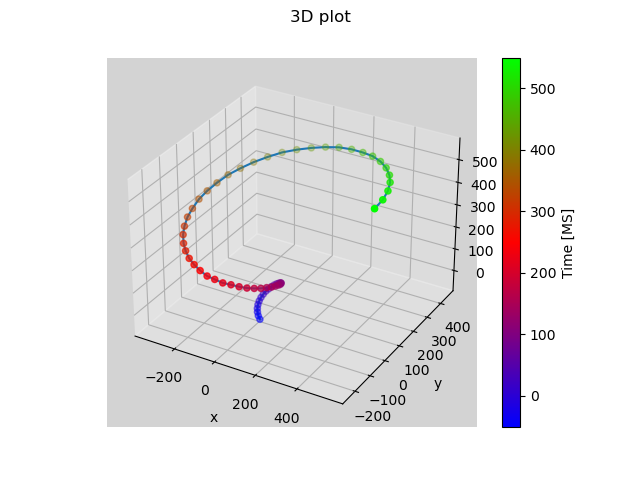

In [86]:
from mpl_toolkits import mplot3d
fig = plt.figure()
fig.suptitle('3D plot')
ax = plt.axes(projection='3d')

ax.plot3D(x, y, z)
fig.colorbar(ax.scatter3D(x, y, z, c=z, cmap='brg'), ax=ax, label='Time [MS]')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# fig.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

In [39]:
jpca = jPCA.JPCA(num_jpcs=4)

(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(
    datas, times=times, tstart=-50, tend=150, subtract_cc_mean=False
)

In [40]:
print(f'jpca_var_capt = {jpca_var_capt}')
print(f'pca_var_capt = {pca_var_capt}')

print("\nInput:")
print(f'len(datas) = {len(datas)}')
print(f'datas[0].shape = {datas[0].shape}')

print("\nOutput:")
# print(np.array_equal(projected[0], np.zeros_like(projected[0])))
print(f'len(projected) = {len(projected)}')
print(f'projected[0].shape = {projected[0].shape}')

jpca_var_capt = [0.00338086 0.00470001 0.0004426  0.00125955]
pca_var_capt = [0.01231528 0.00255591 0.00031484 0.00030608 0.00029133 0.00023763]

Input:
len(datas) = 108
datas[0].shape = (61, 6)

Output:
len(projected) = 108
projected[0].shape = (21, 4)


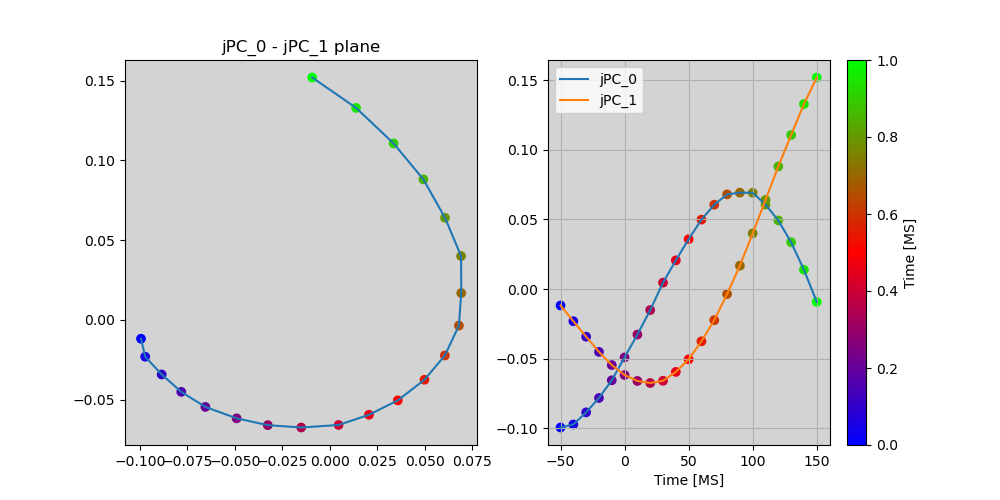

In [87]:
fig, axes = plt.subplots(1,2 , figsize=(10, 5))
cr = np.linspace(0, 1, projected[0].shape[0])
axes[0].plot(projected[0][:, 0], projected[0][:, 1])
axes[0].set_title('jPC_0 - jPC_1 plane')
plt.colorbar(
    axes[0].scatter(projected[0][:, 0], projected[0][:, 1], c=cr, cmap='brg'), 
    ax=axes[1], label='Time [MS]'
)
for i in range(2):
    axes[1].plot(
        t[:projected[0][:, i].shape[0]],projected[0][:, i], 
        label=f'jPC_{i}'
    )
    axes[1].scatter(
        t[:projected[0][:, i].shape[0]],projected[0][:, i], 
        c=cr, cmap='brg'
    )
axes[1].grid()
axes[1].legend()
axes[1].set_xlabel('Time [MS]')
axes[1].set_facecolor('lightgray')
axes[0].set_facecolor('lightgray')
plt.show()

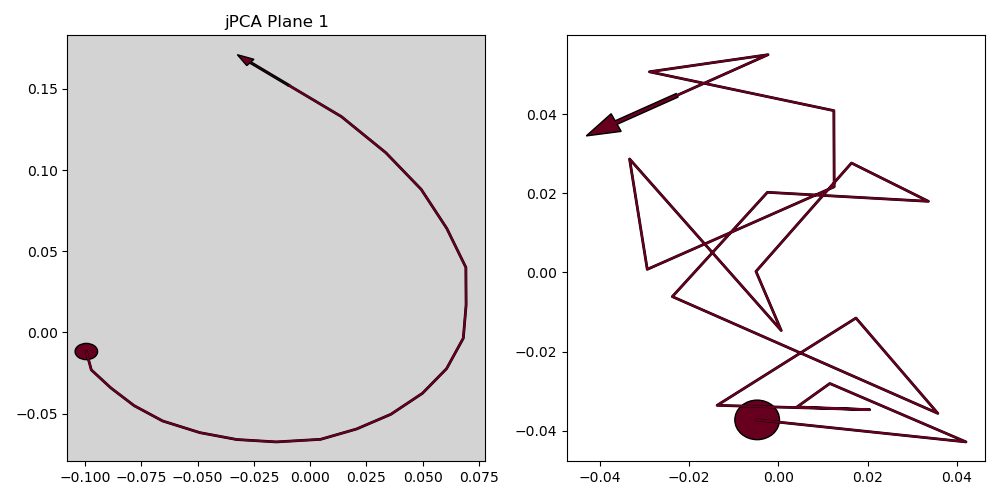

In [90]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
plot_projections(projected[:1], axis=axes[0], x_idx=0, y_idx=1, 
                arrow_size=0.005,
                circle_size=0.005)
plot_projections(projected[:1], axis=axes[1], x_idx=2, y_idx=3, 
                arrow_size=0.005,
                circle_size=0.005)
axes[0].set_title("jPCA Plane 1")
axes[0].set_facecolor('lightgray')
plt.tight_layout()

In [ ]:
# Load publicly available data from Mark Churchland's group
path = "exampleData.mat"
datas, times = load_churchland_data(path)

print(f'len(times) = {len(times)}')
print(f'len(datas) = {len(datas)}')
print(f'datas[0].shape = {datas[0].shape}')

# Create a jPCA object
jpca = jPCA.JPCA(num_jpcs=4)

# Fit the jPCA object to data
(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(datas, times=times, tstart=-50, tend=150)

print(f'len(projected) = {len(projected)}')
print(f'projected[0].shape = {projected[0].shape}')
# Plot the projected data
# x_idx and y_idx control which columns of the data are shown.
# For example, to plot the second jPCA plane, use x_idx=2, y_idx=3
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
plot_projections(projected, axis=axes[0], x_idx=0, y_idx=1)
plot_projections(projected, axis=axes[1], x_idx=2, y_idx=3)

axes[0].set_title("jPCA Plane 1")
axes[1].set_title("jPCA Plane 2")
for i in range(4):
    axes[2].plot(datas[0][:,i])
plt.tight_layout()
plt.show()

In [ ]:
# Here's how we would get the variance of first plane:
print("Variance captured by each jPC:")
jpca_var_capt / full_data_var

In [ ]:
# Example of getting the eigenvalues of M_skew
print("Eigenvalues of M_skew:")
np.round(np.linalg.eigvals(jpca.M_skew), 3)